In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from shapely.geometry import *
from shapely.ops import nearest_points
from utils import *
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
def splitDataframByTaxonomy(geodf,taxonomy,categoryCol):

    splitedDf={}
    for category in taxonomy().keys():
        subcategories=taxonomy()[category]
        entries=geodf.loc[geodf[categoryCol].isin(subcategories)].copy()
        splitedDf[category]=entries

    return splitedDf

In [26]:
crsEuc,crsDeg=getUsualCRS()
bboxEuc,bboxDeg=getUsualBbox()

waterFileDir="../../Dados/BaseLayer/water.shp"
roadsFileDir="../../Dados/BaseLayer/roads.shp"
poisFileDir="../datasets/facebookPOIS/facebookplaces.csv"
newPoisFileDir="../datasets/facebookPOIS/allpois.shp"

In [27]:
df = pd.read_csv(poisFileDir)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.espec_fld_longitude , df.espec_fld_latitude  ),crs=crsDeg)

writeGeodataToGis(geodf=gdf,crs=crsEuc,targetFile=newPoisFileDir)

   Unnamed: 0.1  Unnamed: 0                      name    category_list  \
0             0           0      Estádio José Arcanjo  109976259083543   
1             1           1      Estádio José Arcanjo  109976259083543   
2             2           2      Estádio José Arcanjo  109976259083543   
3             3           3    Estádio Manuel Marques  109976259083543   
4             4           4  Estádio Marques da Silva  209889829023118   

   checkins               hours  espec_fld_latitude  espec_fld_longitude  \
0     883.0  [[9, 22], [9, 19]]           37.029374            -7.848571   
1     883.0   [[9, 19], [9, 2]]           37.029374            -7.848571   
2    3924.0  [[9, 22], [9, 19]]           37.029128            -7.848483   
3     383.0  [[9, 22], [9, 19]]           39.143102            -9.367101   
4     238.0  [[9, 19], [9, 19]]           40.698219            -8.626183   

                   category_name espec_fld_city          macro_category_name  \
0  Stadium, Arena 

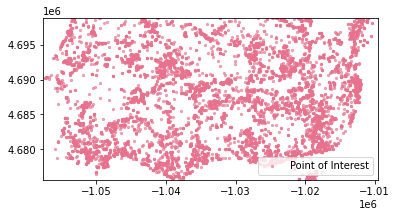

In [31]:
pois=readGeodatafromFile(targetFile=newPoisFileDir,bbox=bboxEuc,crs=crsEuc)
ax=plotBaseMap(roadsFileDir, waterFileDir, bboxEuc, bboxEuc,crsEuc)
pois.plot(ax=ax, marker='.', markersize=20,color="#e8718d",alpha=0.6,label='Point of Interest')
plt.legend()
plt.show()

In [32]:
pois=readGeodatafromFile(targetFile=newPoisFileDir,bbox=bboxEuc,crs=crsEuc)
categories=taxonomy()
print(categories)

splittedPOIS=splitDataframByTaxonomy(pois, taxonomy, "macro_cate")
for cat in categories:
    geodf=splittedPOIS[cat]
    fileDir="../datasets/facebookPOIS/{}.shp".format(cat)
    print("{}: {}".format(cat,len(geodf)))
    writeGeodataToGis(targetFile=fileDir,crs=crsEuc,geodf=geodf)



{'Lazer': ['Sports & Recreation', 'Sports Club', 'Country Club / Clubhouse', 'Social Club', 'Performance Art', 'Art'], 'Industria': ['Media/News Company', 'Commercial & Industrial'], 'Educacao': ['Education', 'Campus Building'], 'Saude': ['Medical & Health'], 'Turismo': ['Landmark & Historical Place', 'Hotel & Lodging'], 'Comercio': ['Food & Beverage', 'Shopping & Retail', 'Beauty, Cosmetic & Personal Care'], 'Servicos': ['Local Service', 'Public & Government Service']}
Lazer: 505
Industria: 161
Educacao: 231
Saude: 264
Turismo: 308
Comercio: 2236
Servicos: 901
